# code for library 

In [1]:
import couchdb
import datetime
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

class DatabaseManipulator(object):
    def __init__(self, server, port, db_name):
        server = couchdb.Server('{}:{}/'.format(server, port))
        db = server[db_name]
        self.db = db
        self.ts_dict = {}
        plt.style.use('dark_background')

    def convertToDateTimeObj(self, unixTime):
        return datetime.datetime.fromtimestamp(
            unixTime
        )


class EnvironmentalDatabaseManipulator(DatabaseManipulator):
    def __init__(self, server, port, db_name):
        super(EnvironmentalDatabaseManipulator, self).__init__( server, port, db_name)

    def getSensorDataList(self, variable, limit=1000):
        '''
        argments are
        variable : envrionemental name such as 'air_humidity'  as a string
        limit : number of data points to load from database 
        
        return object of Series 
        index is time labeled, value list (1d ndarray) represents sensor data points.
        '''
        map_fun = '''function(doc) {{
            if (doc.variable == '{}')
                emit(doc.timestamp, doc.value);
        }}'''.format(variable)

        row_list = self.db.query(map_fun, descending=True, limit=limit)
        date_value_list = np.array([[
            row.value,
            self.convertToDateTimeObj(row.key)]
        for row in row_list])
        ts = Series(date_value_list[:,0].astype(dtype=np.float64), index=date_value_list[:,1])
        return ts

    def setSensorDataList(self, variable, limit=1000):
        self.ts_dict[variable] = self.getSensorDataList(variable, limit)
        return

    def plotVariableGraph(self, variable, ylim=(0,5), time_from=None):
        if variable in self.ts_dict:
            ts = self.ts_dict[variable]
            ts_tmp = ts[::2] #since there are the same data duplicated
            if time_from:
                ts_tmp = ts_tmp[:time_from]
            tmp_df = DataFrame(ts_tmp)
            tmp_df.plot(ylim=ylim, style='o', figsize=(15,10))
            plt.title(variable)
            plt.show()
        else:
            print('{} does not exist in ts_dict'.format(variable))

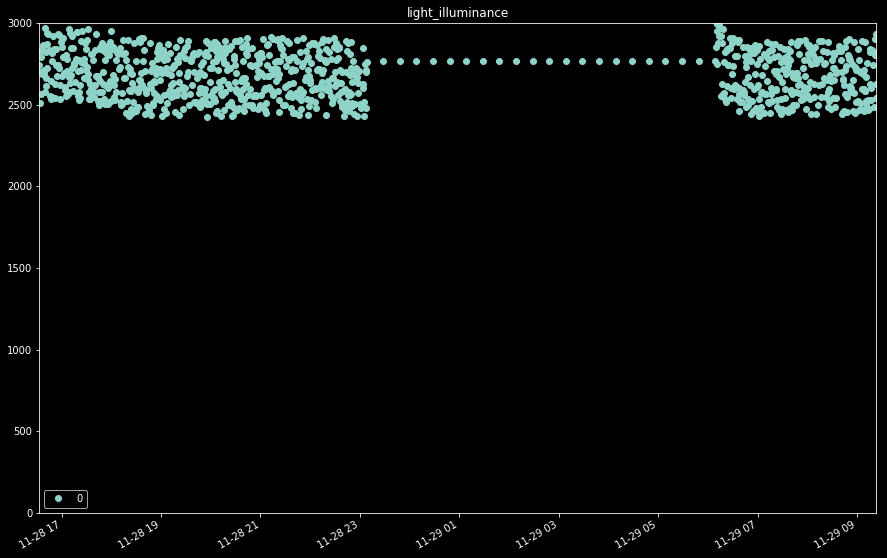

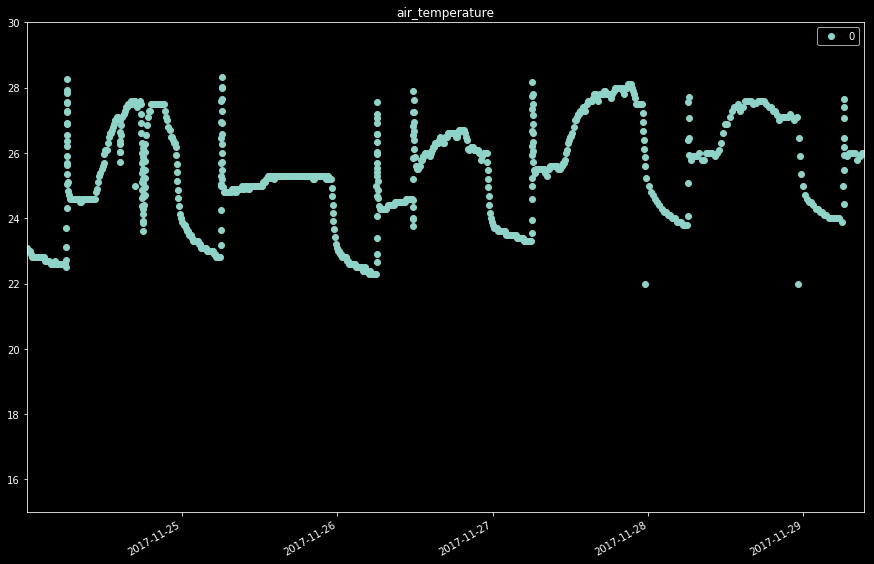

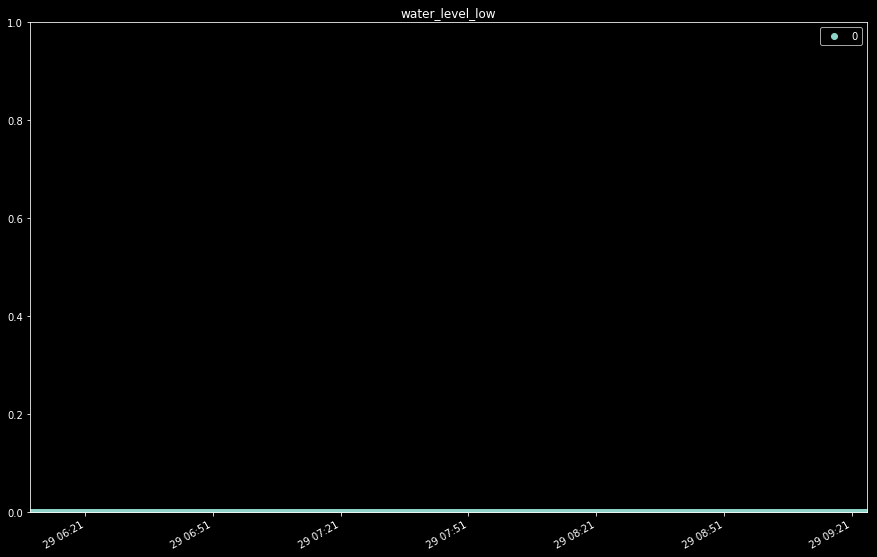

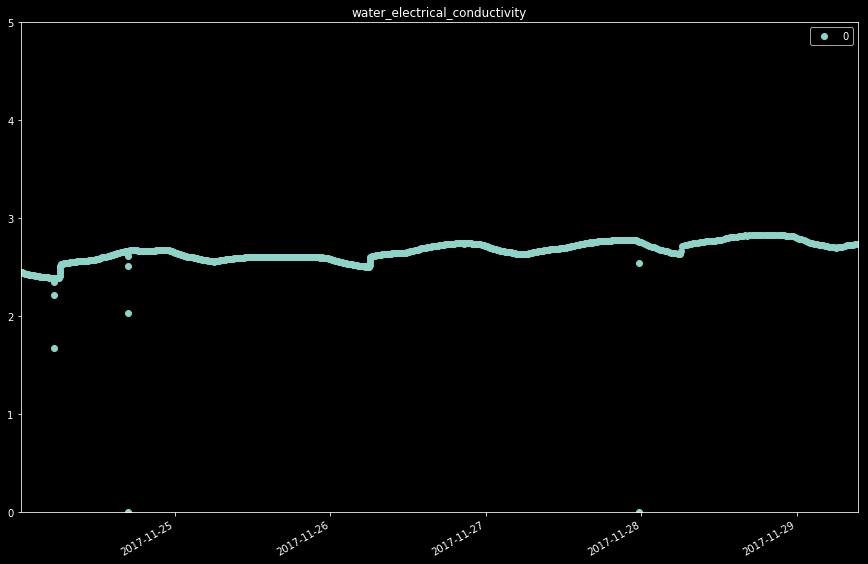

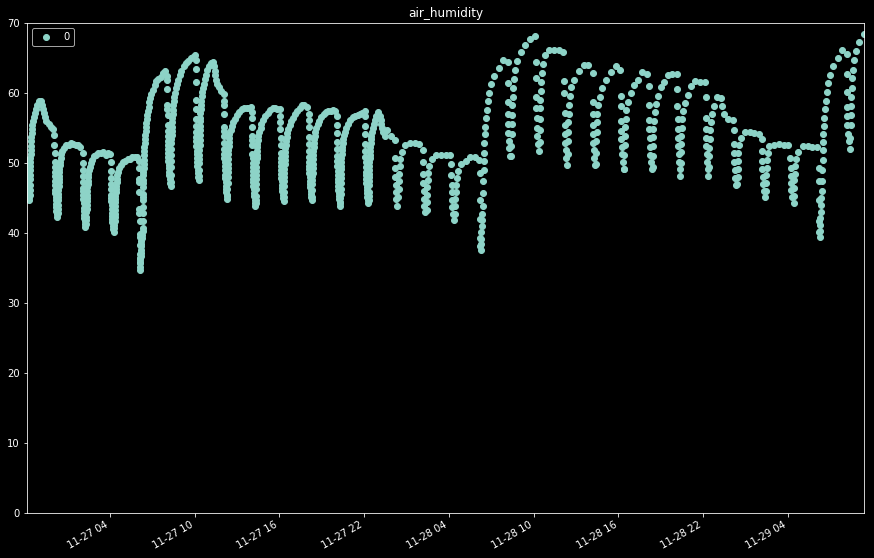

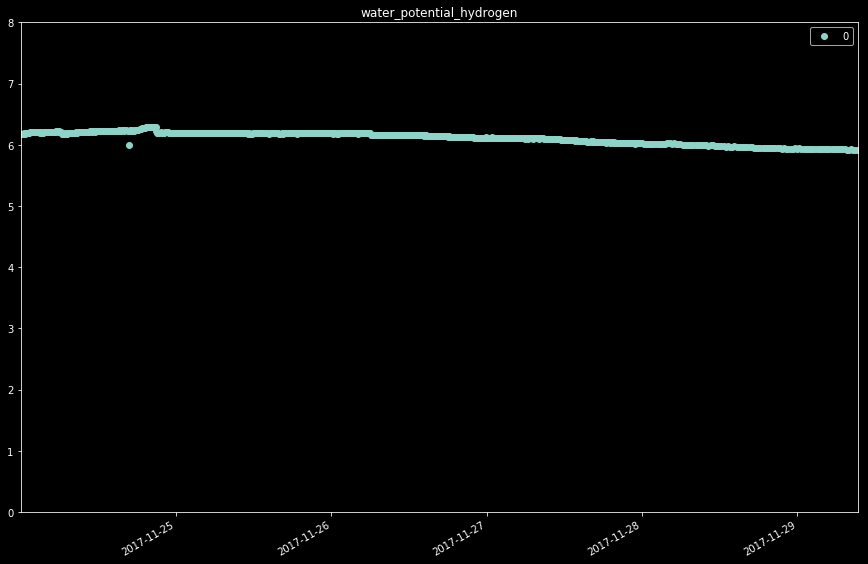

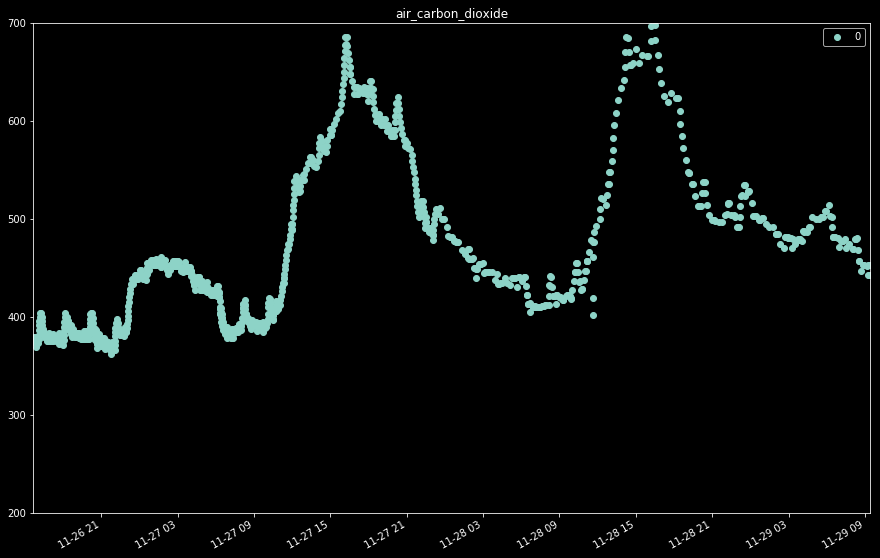

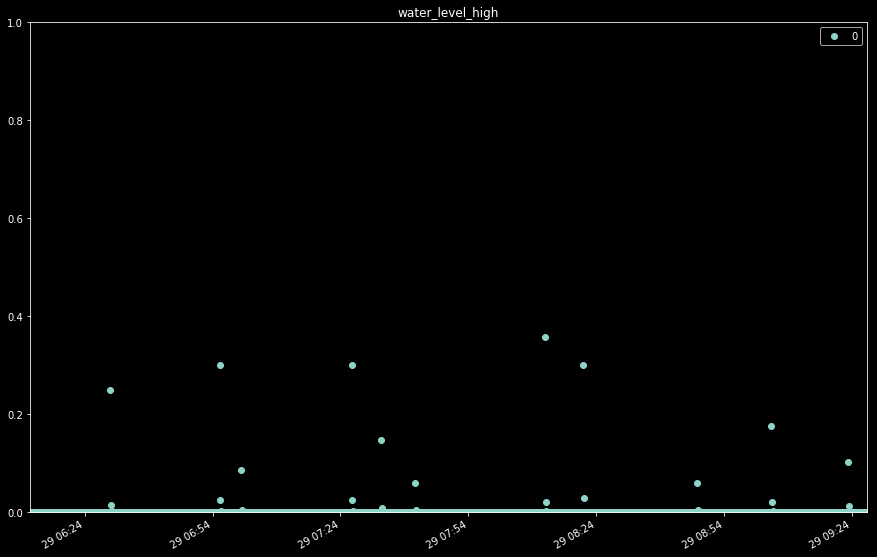

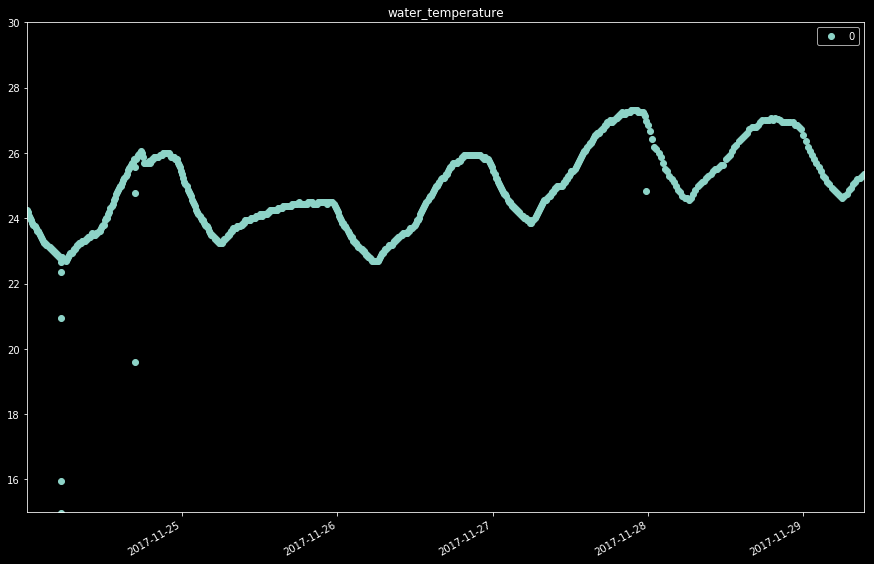

In [2]:
db_instance = EnvironmentalDatabaseManipulator(
    server='http://localhost', 
    port=5984, 
    db_name='environmental_data_point'
)
sensor_dict = {
    'air_humidity':(0,70),
    'air_temperature':(15,30),
    'air_carbon_dioxide':(200,700),
    'water_temperature':(15,30),
    'water_level_low':(0,1),
    'water_level_high':(0,1),
    'water_potential_hydrogen':(5,7),
    'water_electrical_conductivity':(0,5),
    'light_illuminance':(0,3000)
}
for variable, ylim in sensor_dict.iteritems():
    db_instance.setSensorDataList(variable, limit=2000)
    db_instance.plotVariableGraph(variable=variable, ylim=ylim, time_from='2017-11-24' )

In [3]:
'''
 pd.DataFradb_instance.ts_dict,
    'air_temperature':(15,30),
    'air_carbon_dioxide':(200,700),
    'water_temperature':(15,30),
    'water_level_low':(0,1),
    'water_level_high':(0,1),
    'water_potential_hydrogen':(0,8),
    'water_electrical_conductivity':(0,5),
    'light_illuminance':(0,3000)
'''
# TO EXCECUTE
df = DataFrame(db_instance.ts_dict)

df['air_temperature', 'water_temperature'].plot()
plot.show()

df['air_carbon_dioxide', 'water_potential_hydrogen'].plot()
plot.show()

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

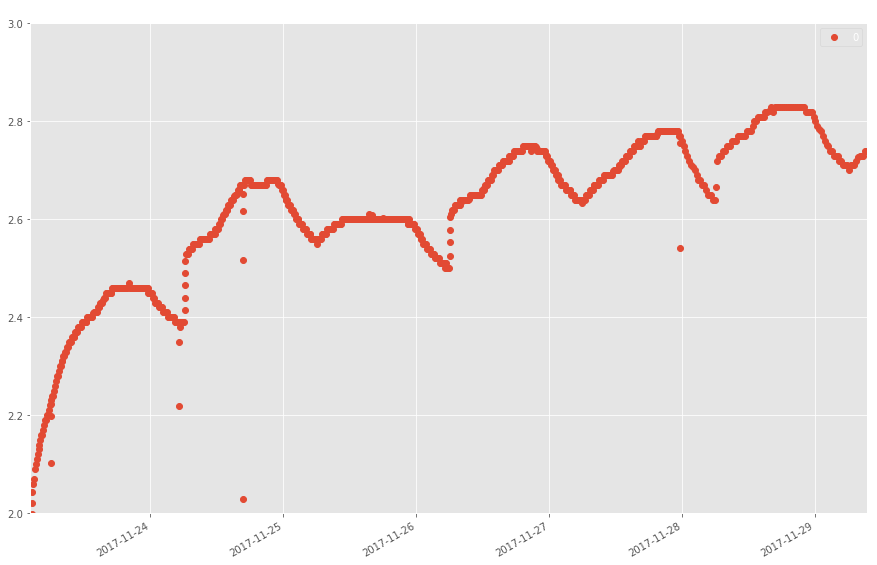

In [11]:
plt.style.use('ggplot')
db_instance.plotVariableGraph(variable='water_electrical_conductivity', ylim=[2,3], time_from='2017-11-23' )

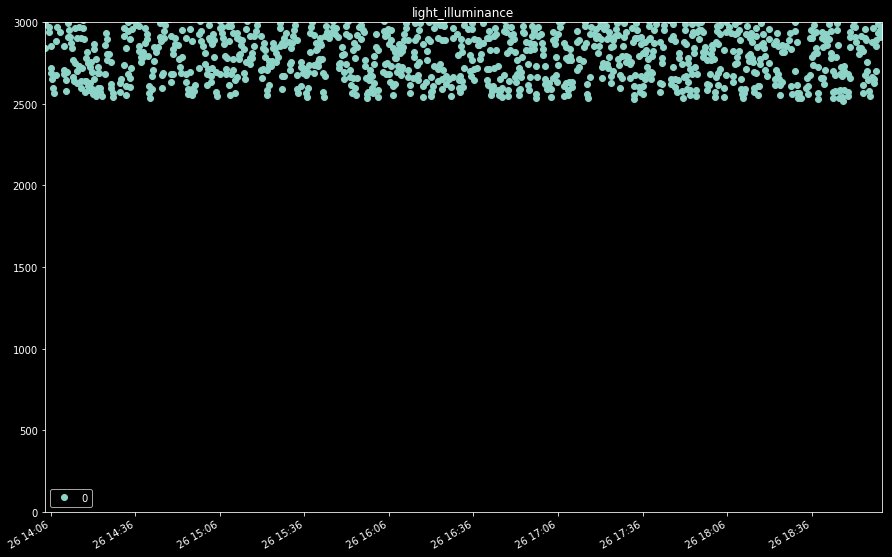

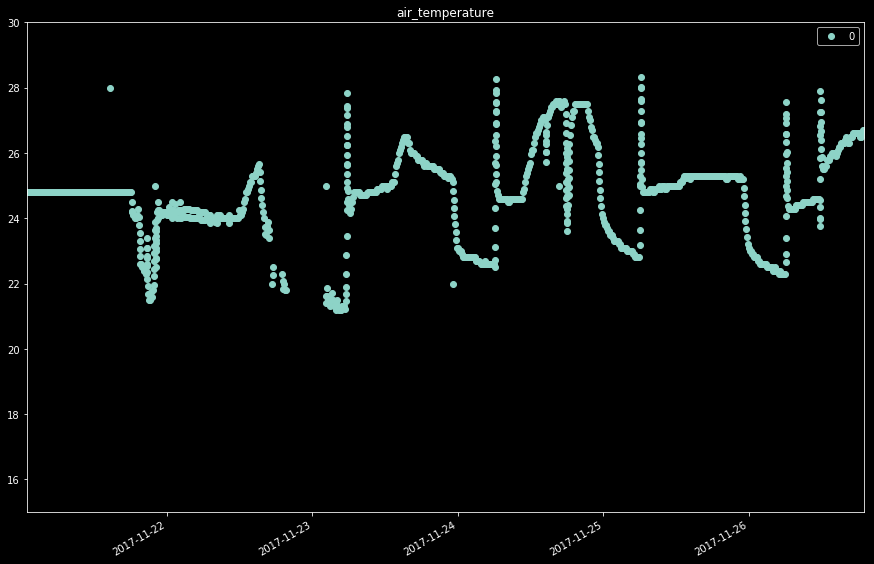

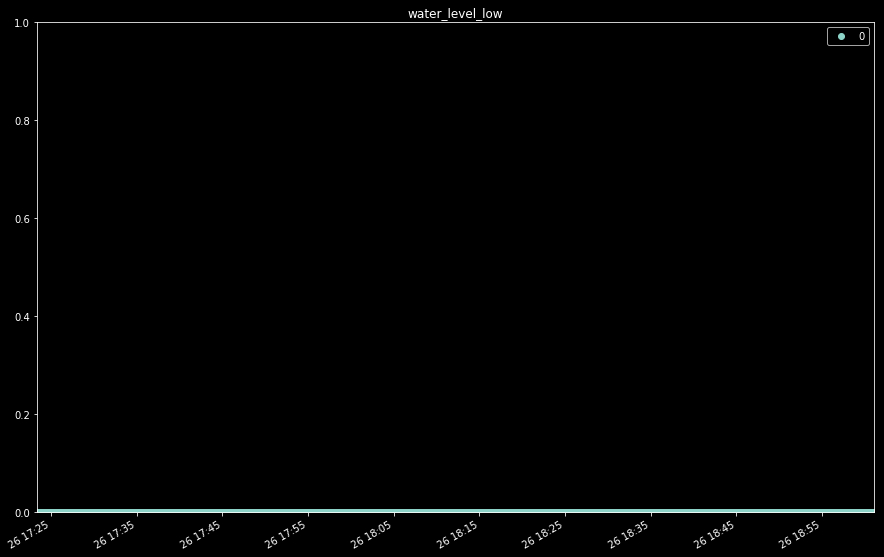

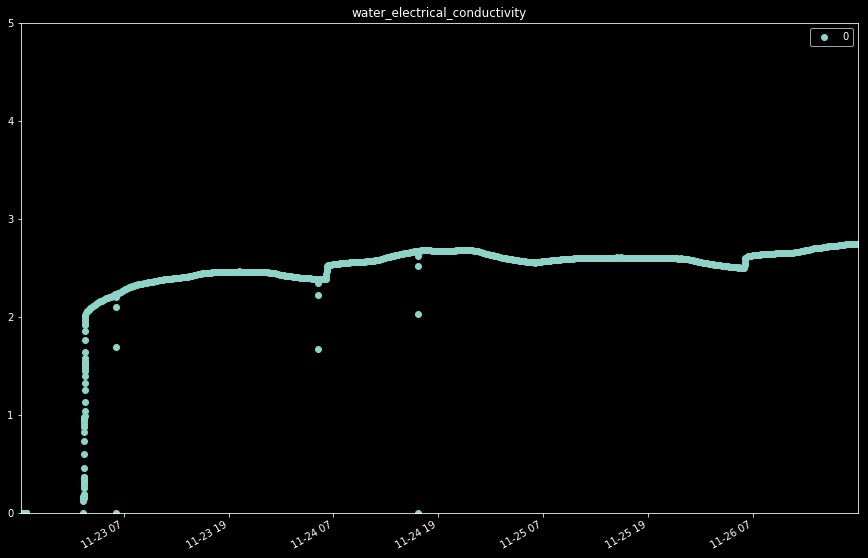

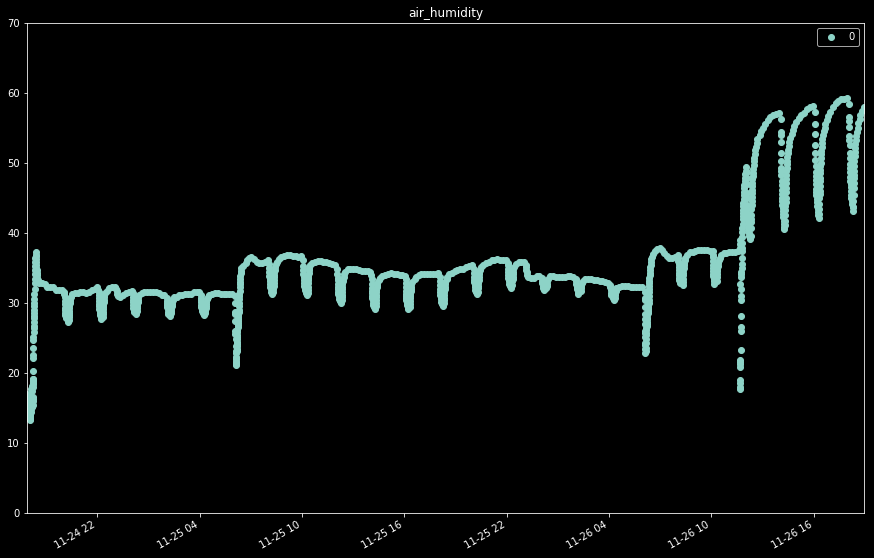

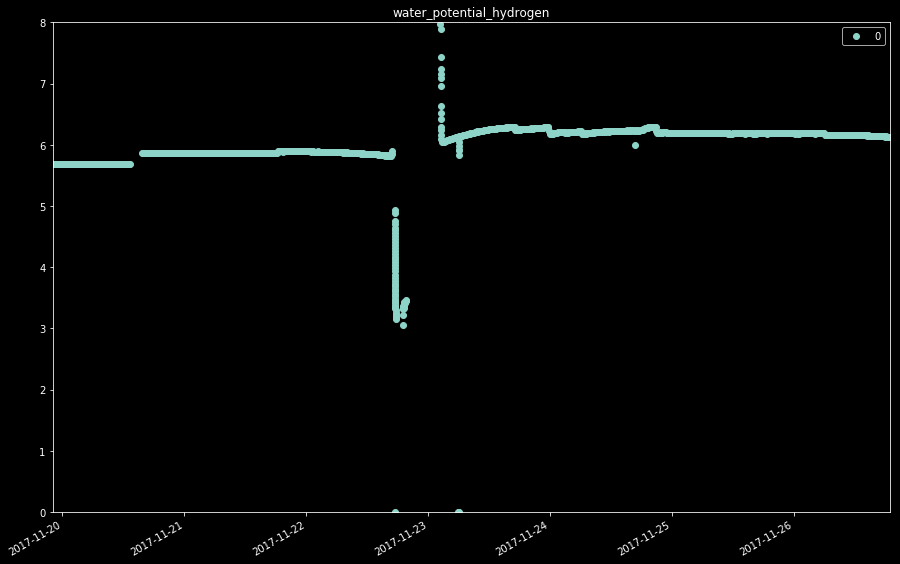

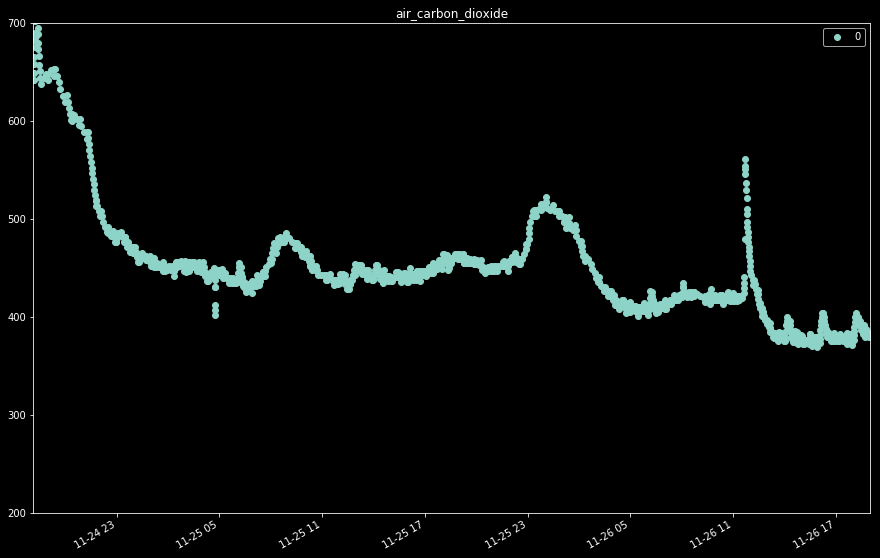

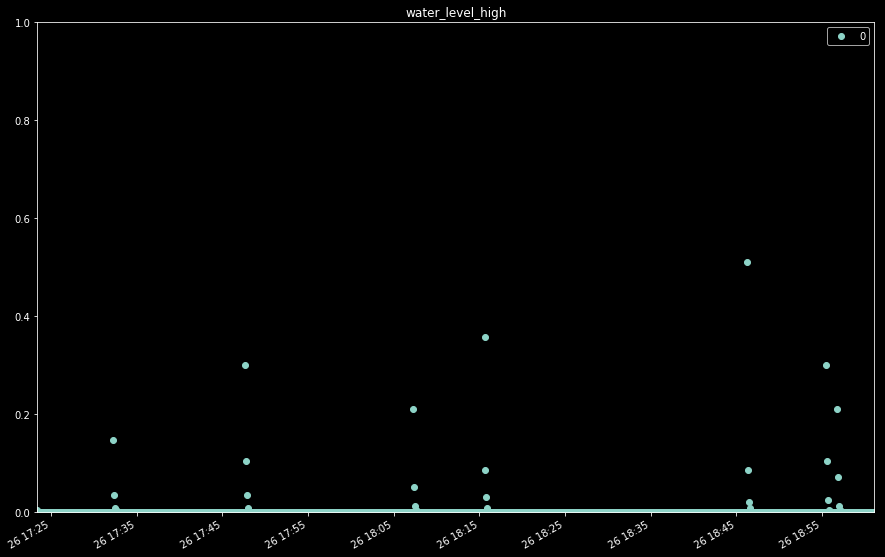

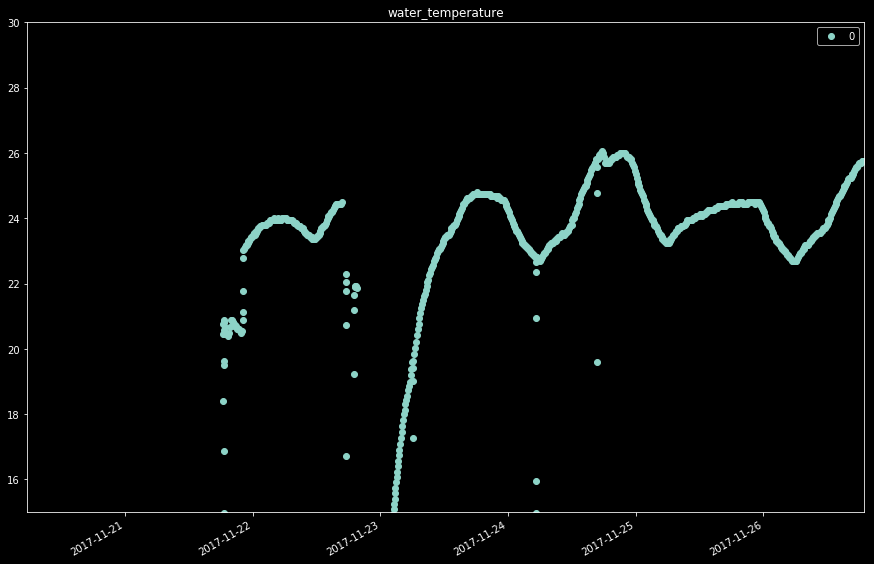

In [93]:
for variable, ylim in sensor_dict.iteritems():
    plotVariableGraph(variable=variable, ylim=ylim)

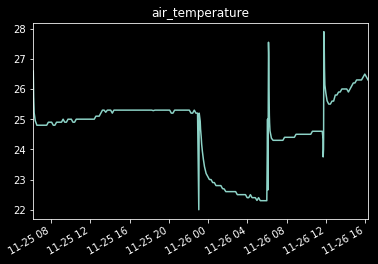

In [5]:
db_instance.setSensorDataList(variable='air_temperature', limit=500)
db_instance.showVaribableGraph('air_temperature')

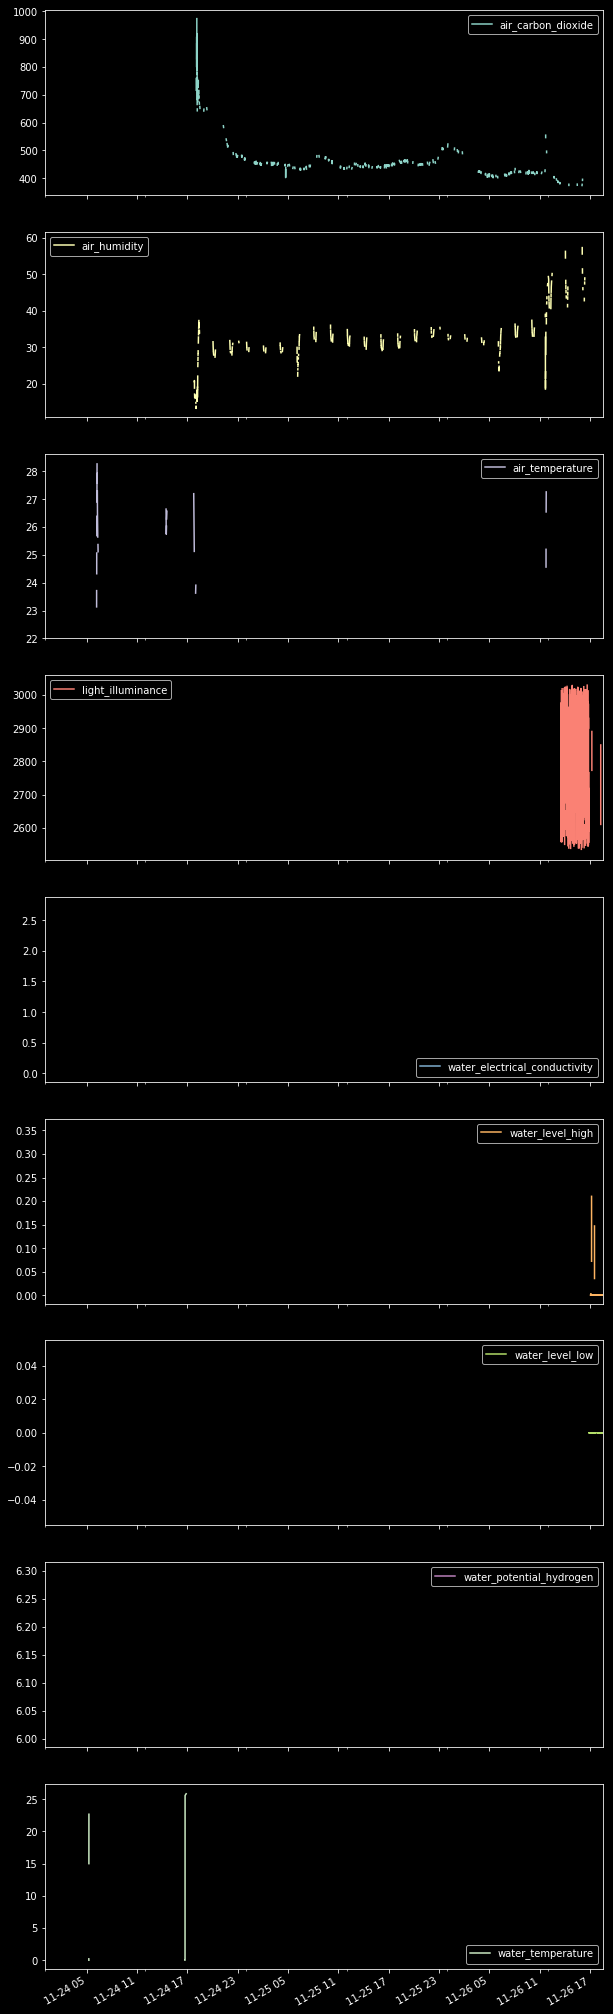

In [81]:
import datetime

df_dict ={}
for sensor_variable in sensor_list:
    ts = db_instance.getSensorDataList(variable=sensor_variable, limit=2000)
    ts_tmp = ts[::2]
    df_dict[sensor_variable] = ts_tmp[:'2017-11-24']
sensor_dataframe = DataFrame(df_dict)
sensor_dataframe.plot(subplots=True, figsize=(10,40))
plt.show()


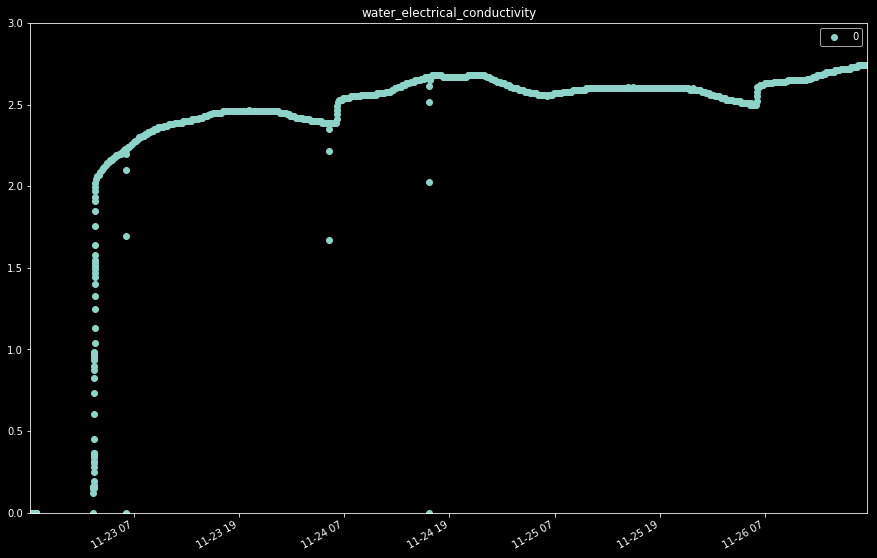

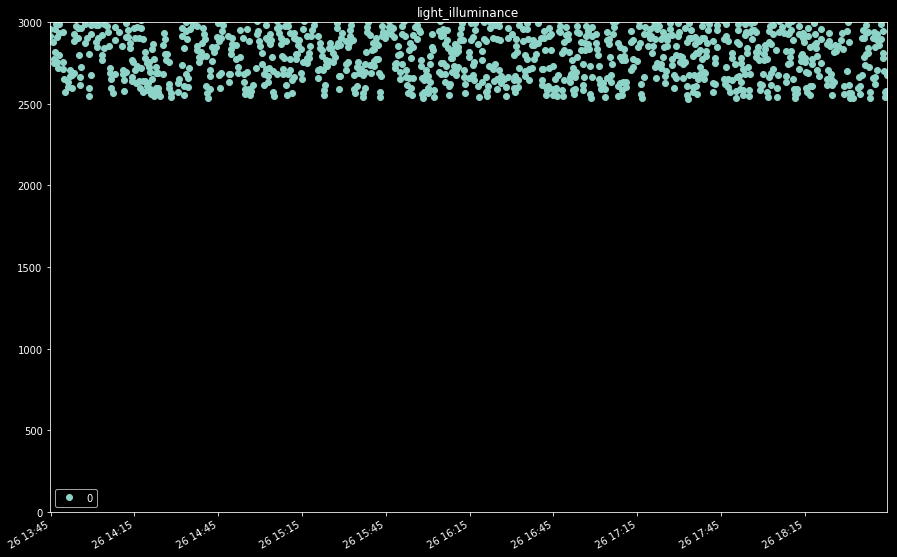

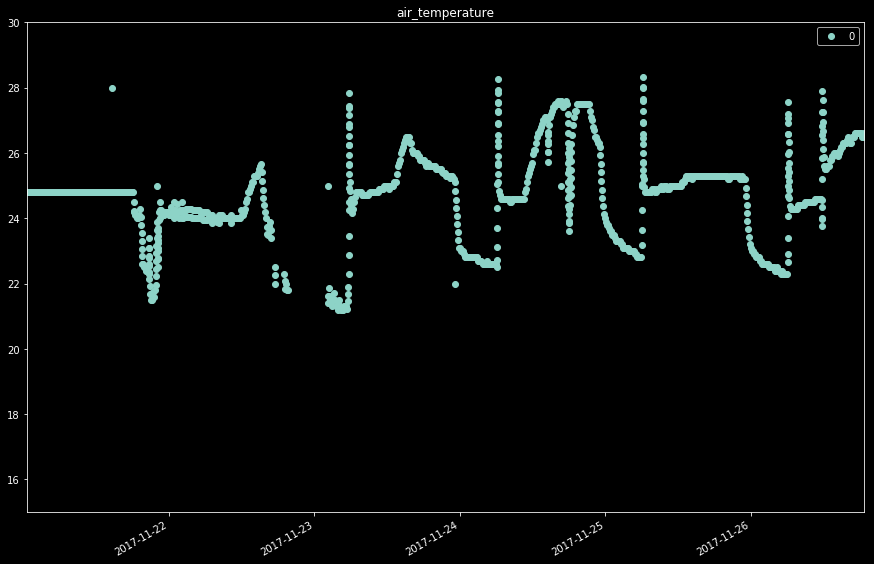

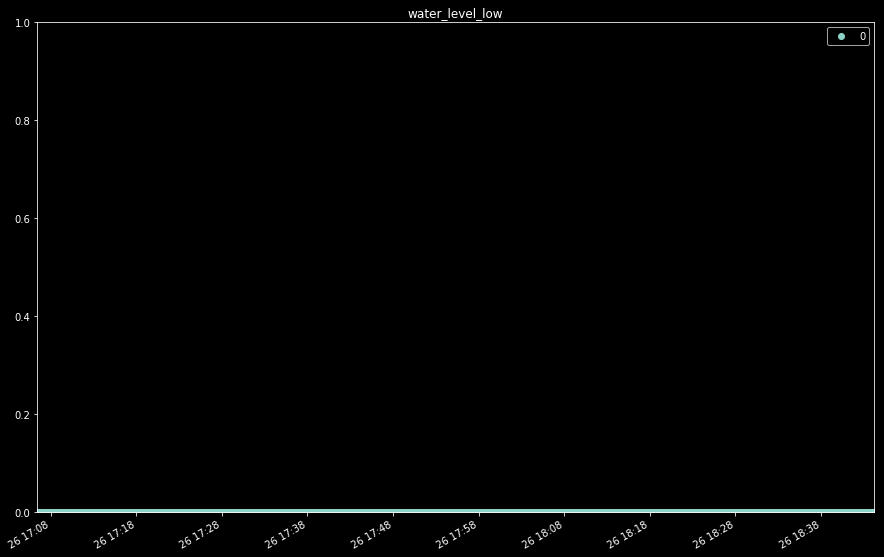

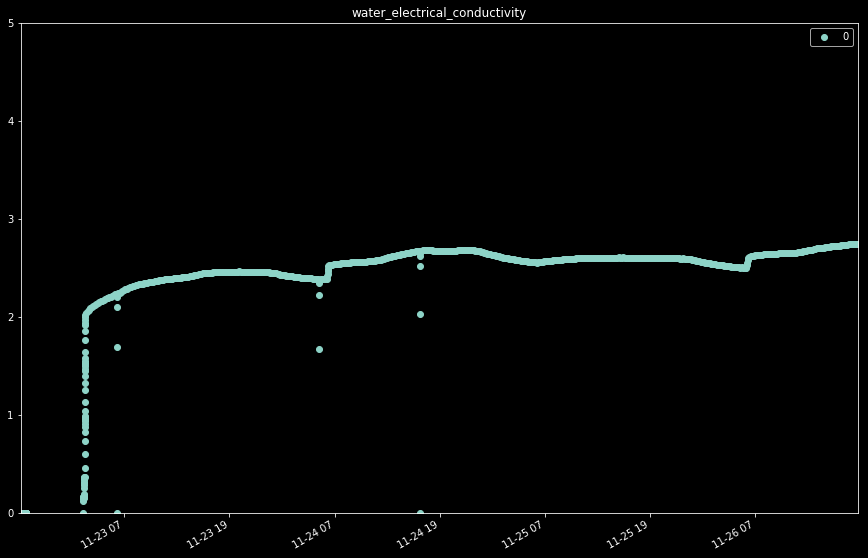

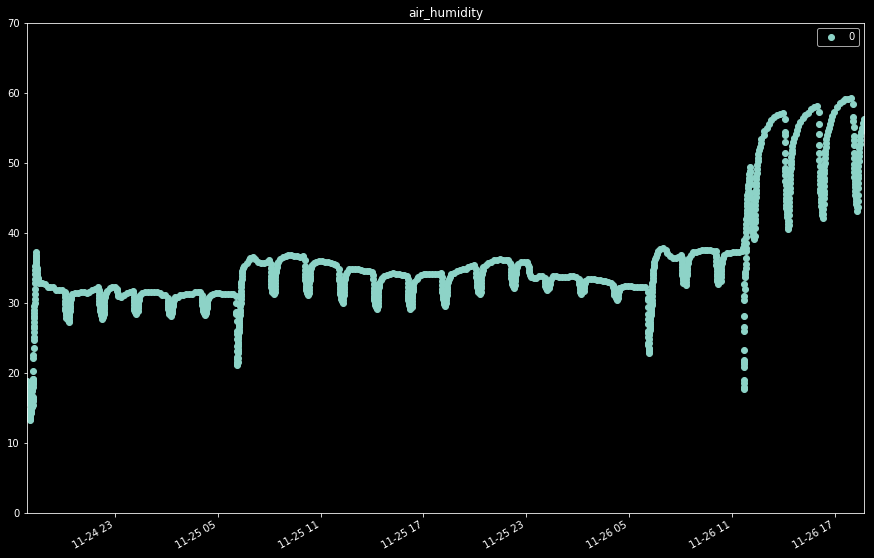

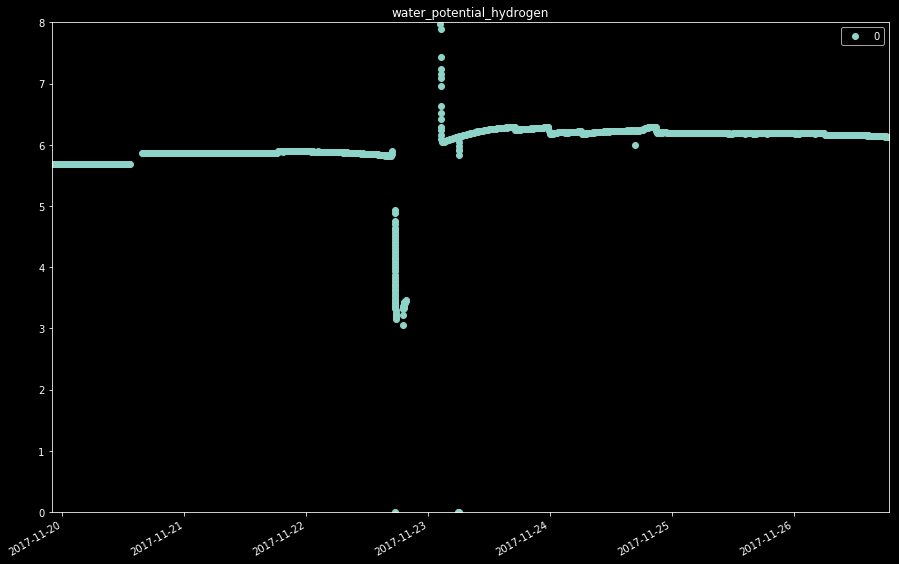

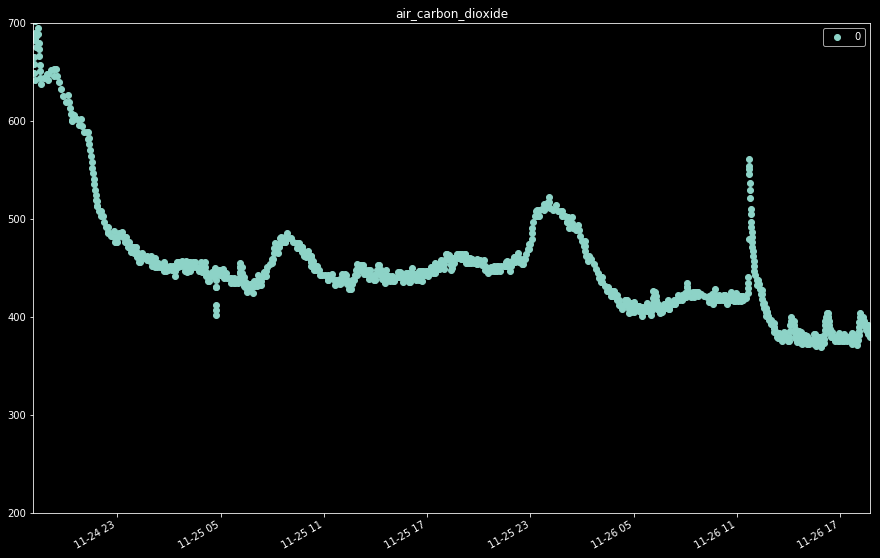

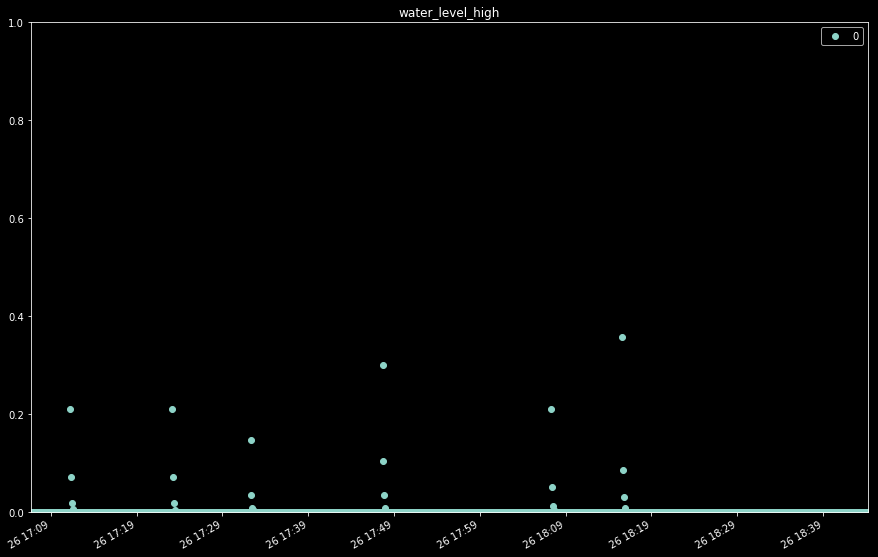

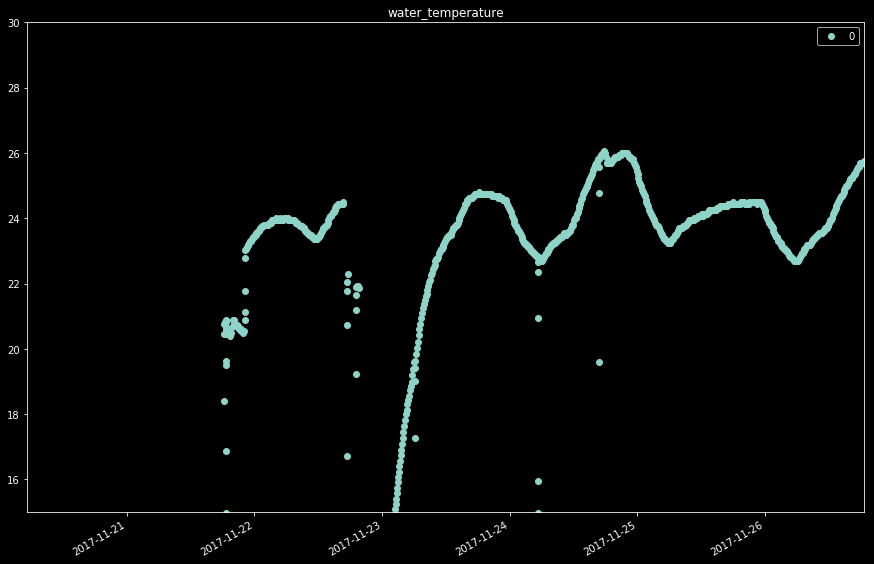

In [89]:

def plotVariableGraph(variable, ylim=(0,5) ):
    sensor_variable = variable
    ts = db_instance.getSensorDataList(variable=sensor_variable, limit=2000)
    ts_tmp = ts[::2]
    tmp_df = DataFrame(ts_tmp)
    tmp_df.plot(ylim=ylim, style='o', figsize=(15,10))
    plt.title(variable)
    plt.show()
plotVariableGraph(variable='water_electrical_conductivity', ylim=(0,3))
for variable, ylim in sensor_dict.iteritems():
    plotVariableGraph(variable=variable, ylim=ylim)